In [1]:
%matplotlib inline


# Single Gramian angular field

A Gramian angular field is an image obtained from a time series, representing
some kind of temporal correlation between each pair of values from the time
series. Two methods are available: Gramian angular summation field and Gramian
angular difference field.
It is implemented as :class:`pyts.image.GramianAngularField`.

In this example, the considered time series is the sequence of the sine
function values for 1000 equally-spaced points in the interval
$[0, 4\pi]$.
Both the corresponding Gramnian angular summation and difference fields are
plotted.

Since the API is designed for machine learning, the
:meth:`~pyts.image.GramianAngularField.transform` method of the
:class:`pyts.image.GramianAngularField` class expects a data set of time series
as input, so the time series is transformed into a data set with a single time
series (``X = np.array([x])``) and the first element of the data set of
Gramian angular fields is retrieved (``ax_gasf.imshow(X_gasf[0], ...``).


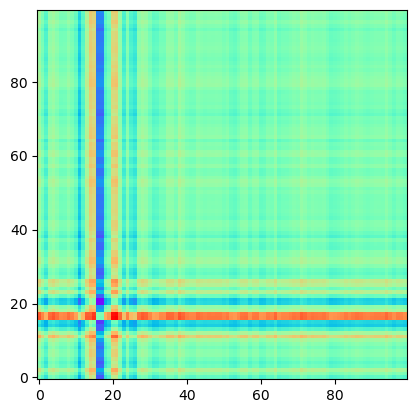

In [31]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
import librosa
import PIL.Image as pil_image
# Load the time series
absent_wav_path = r'D:\Shilong\murmur\01_dataset\12_baseset_16k\fold_set_0\absent\14241_AV_s2+Diastolic_1_Absent_nan_210.wav'
present_wav_path = r'D:\Shilong\murmur\01_dataset\12_baseset_16k\fold_set_0\present\14241_AV_s1+Systolic_1_Present_Early-systolic_210.wav'
y, sr = librosa.load(absent_wav_path, sr=4000)


X = np.array([y])

# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(method='difference')
X_gadf = gadf.fit_transform(X)
#  bicubic interpolation
img = pil_image.fromarray(X_gadf[0])
image = img.resize((100, 100), resample=pil_image.BICUBIC)
image = np.array(image)
plt.imshow(image, cmap='rainbow', origin='lower')